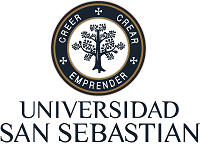

## Curso: Machine Learning
## Magíster Data Science
## Diego Miranda Olavarría

In [1]:
from sklearn import datasets # importa el dataset
from sklearn.model_selection import train_test_split # Separa el conjunto de entrenamiento y testeo
from sklearn.metrics import accuracy_score # Precisión
import numpy as np # Para cálculo AUC y curva ROC

In [2]:
digits = datasets.load_digits()

In [3]:
dir(digits) 

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits["data"].shape

(1797, 64)

In [5]:
digits["target"].shape

(1797,)

In [6]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

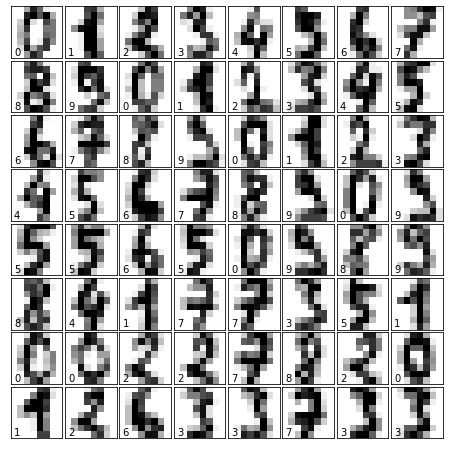

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# se muestran las imágenes y se definen los pixeles
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # se etiquetan las imágenes
    ax.text(0, 7, str(digits.target[i]))

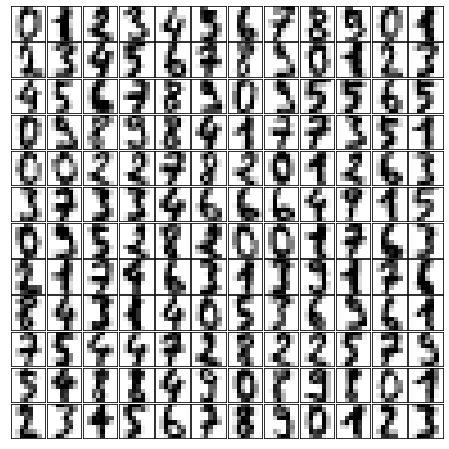

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(144):
    ax = fig.add_subplot(12, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    


### Dividir los datos entre conjunto de entrenamiento y de validación

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

### Preprocesamiento de datos

In [10]:
# Escalado (estandarización) para asegurar importancia similar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Datos de entrenamiento estandarizados
X_test = sc.transform(X_test)        # Datos de prueba estandarizados con los parámetros anteriores

# K-NN

In [11]:
from sklearn.neighbors import KNeighborsClassifier # Librería para knn

### Definición del modelo K-NN

In [12]:
# Se crea el modelo con un valor de k=5 (número de vecinos)
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento del modelo con los datos correspondientes
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Predicciones y evaluación del modelo

In [13]:
# Predicciones a partir del conjunto de prueba
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9694444444444444


# Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier # algoritmo de calsificación a utilizar

### Definición del modelo

In [15]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Predicciones y evaluación del modelo

In [16]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", "{:.2f}".format(accuracy*100),"%")

Accuracy: 85.00 %


# Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB # no se ocupará el modelo multinomial, se ocupará Gaussian
from sklearn.preprocessing import MinMaxScaler # Para el error: ValueError: Negative values in data passed to MultinomialNB (input X)
from sklearn.naive_bayes import GaussianNB # Ocupar este algoritmo para NB

### Definición del modelo 

In [18]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


clf = GaussianNB() 
clf.fit(X_train, y_train)

GaussianNB()

### Predicciones y evaluación del modelo

In [19]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", "{:.2f}".format(accuracy*100),"%")

Accuracy: 80.00 %


# SVM (Suport vector machine)

In [20]:
from sklearn.svm import SVC # Libería para SVM

### Definición del modelo

In [21]:
svm = SVC()  # Crea el modelo SVM

# Entrenamiento del modelo con los datos correspondientes
svm.fit(X_train, y_train)

SVC()

### Predicciones y evaluación del modelo

In [22]:
# Predicciones a partir del conjunto de prueba
y_pred = svm.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9916666666666667


# Precisión, Sensibilidad, Especificidad y Medida F1

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Diego Miranda\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [24]:
# Clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
#knn_acc = round(accuracy_score(y_test, knn_pred) * 100, 2)

# Clasificador Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
#nb_acc = round(accuracy_score(y_test, nb_pred) * 100, 2)

# Clasificador Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
#dt_acc = round(accuracy_score(y_test, dt_pred) * 100, 2)

# Clasificador SVC
svm = SVC()  
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
#svm_acc = round(accuracy_score(y_test, svm_pred) * 100, 2)


# Cálculo de métricas para cada clasificador


knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='weighted')
knn_rec = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')
knn_spec = confusion_matrix(y_test, knn_pred)[0, 0] / (confusion_matrix(y_test, knn_pred)[0, 0] + confusion_matrix(y_test, knn_pred)[0, 1])

nb_acc = accuracy_score(y_test, nb_pred)
nb_prec = precision_score(y_test, nb_pred, average='weighted')
nb_rec = recall_score(y_test, nb_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')
nb_spec = confusion_matrix(y_test, nb_pred)[0, 0] / (confusion_matrix(y_test, nb_pred)[0, 0] + confusion_matrix(y_test, nb_pred)[0, 1])

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='weighted')
dt_rec = recall_score(y_test, dt_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_pred, average='weighted')
dt_spec = confusion_matrix(y_test, dt_pred)[0, 0] / (confusion_matrix(y_test, dt_pred)[0, 0] + confusion_matrix(y_test, dt_pred)[0, 1])

svm_acc = accuracy_score(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred, average='weighted')
svm_rec = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')
svm_spec = confusion_matrix(y_test, svm_pred)[0, 0] / (confusion_matrix(y_test, svm_pred)[0, 0] + confusion_matrix(y_test, svm_pred)[0, 1])


# Resultados en una tabla
table = [
    ["KNN", knn_acc, knn_prec, knn_rec, knn_spec,knn_f1],
    ["Naive Bayes", nb_acc, nb_prec, nb_rec, nb_spec,nb_f1],
    ["Decision Tree", dt_acc, dt_prec, dt_rec, dt_spec,dt_f1],
    ["Support Vector Machine", svm_acc, svm_prec, svm_rec, svm_spec,svm_f1]

]

headers = ["Algoritmo", "Exactitud", "Precisión", "Sensibilidad", "Especificidad","Medida F1"]

# Impresión de la tabla
print(tabulate(table, headers, tablefmt="fancy_grid"))

╒════════════════════════╤═════════════╤═════════════╤════════════════╤═════════════════╤═════════════╕
│ Algoritmo              │   Exactitud │   Precisión │   Sensibilidad │   Especificidad │   Medida F1 │
╞════════════════════════╪═════════════╪═════════════╪════════════════╪═════════════════╪═════════════╡
│ KNN                    │    0.980556 │    0.981751 │       0.980556 │               1 │    0.980505 │
├────────────────────────┼─────────────┼─────────────┼────────────────┼─────────────────┼─────────────┤
│ Naive Bayes            │    0.8      │    0.84418  │       0.8      │               1 │    0.79739  │
├────────────────────────┼─────────────┼─────────────┼────────────────┼─────────────────┼─────────────┤
│ Decision Tree          │    0.861111 │    0.86873  │       0.861111 │               1 │    0.861278 │
├────────────────────────┼─────────────┼─────────────┼────────────────┼─────────────────┼─────────────┤
│ Support Vector Machine │    0.991667 │    0.991744 │       0.9

# Matriz de confusión para cada clasificador

### Matriz de confusión K-NN

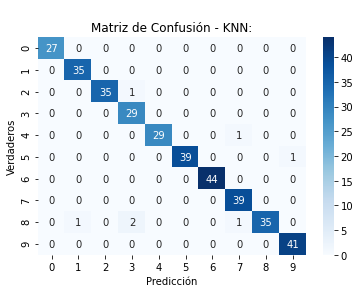

In [25]:
cm1 = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm1, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - KNN:")
plt.show()

### Matriz de confusión Naive Bayes

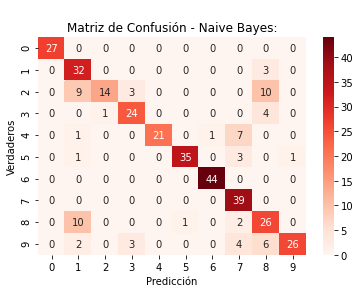

In [26]:
cm2 = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm2, annot=True, cmap="Reds")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - Naive Bayes:")
plt.show()

### Matriz de confusión Decision Tree

Text(0.5, 1.0, '\nMatriz de Confusión - Decision Tree:')

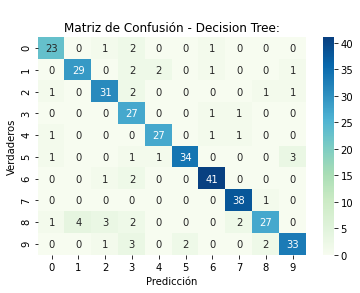

In [27]:
cm3 = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm3, annot=True, cmap="GnBu")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - Decision Tree:")

### Matriz de confusión Support Vector Machine

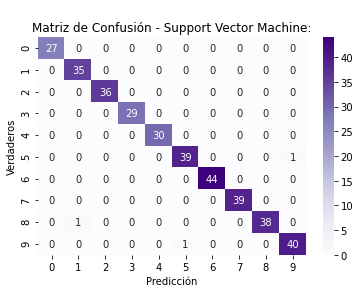

In [28]:
cm4 = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm4, annot=True, cmap="Purples")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.title("\nMatriz de Confusión - Support Vector Machine:")
plt.show()

# Curva ROC y cálculo AUC

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


# Binarizar las etiquetas de prueba
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calcular las probabilidades de predicción para cada clase
knn_probs = knn.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
dt_probs = dt.predict_proba(X_test)



knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for i in range(len(np.unique(y_test))):
    knn_fpr[i], knn_tpr[i], _ = roc_curve(y_test_bin[:, i], knn_probs[:, i])
    knn_auc[i] = roc_auc_score(y_test_bin[:, i], knn_probs[:, i])

nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for i in range(len(np.unique(y_test))):
    nb_fpr[i], nb_tpr[i], _ = roc_curve(y_test_bin[:, i], nb_probs[:, i])
    nb_auc[i] = roc_auc_score(y_test_bin[:, i], nb_probs[:, i])

dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for i in range(len(np.unique(y_test))):
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y_test_bin[:, i], dt_probs[:, i])
    dt_auc[i] = roc_auc_score(y_test_bin[:, i], dt_probs[:, i])

    
    
# Calcular el promedio de los AUC de todas las clases
knn_avg_auc = np.mean(list(knn_auc.values()))
nb_avg_auc = np.mean(list(nb_auc.values()))
dt_avg_auc = np.mean(list(dt_auc.values()))




print("KNN AUC promedio:", knn_avg_auc)
print("Naive Bayes AUC promedio:", nb_avg_auc)
print("Decision Tree AUC promedio:", dt_avg_auc)




KNN AUC promedio: 0.9985134417883623
Naive Bayes AUC promedio: 0.9747724786830524
Decision Tree AUC promedio: 0.9236101119851139


### Curva ROC K-NN

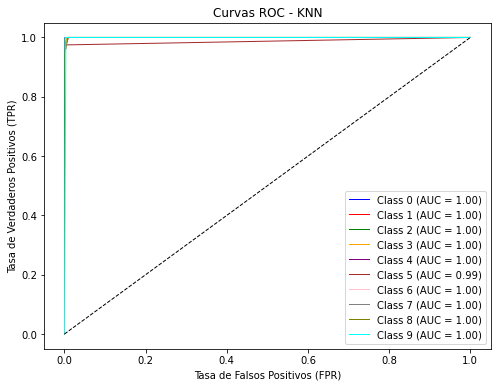

In [30]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(knn_fpr[i], knn_tpr[i], color=color, lw=1, label=f'Class {i} (AUC = {knn_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - KNN')
plt.legend(loc='lower right')
plt.show()

### Curva ROC Naive Bayes

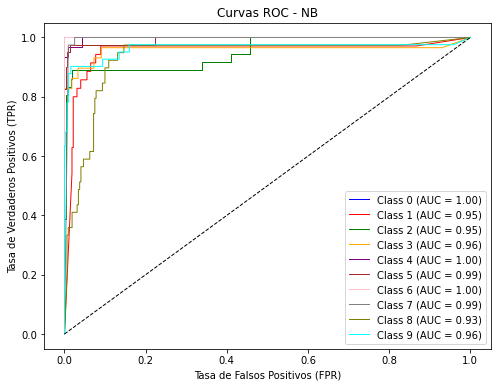

In [31]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(nb_fpr[i], nb_tpr[i], color=color, lw=1, label=f'Class {i} (AUC = {nb_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - NB')
plt.legend(loc='lower right')
plt.show()

### Curva ROC Decision Tree

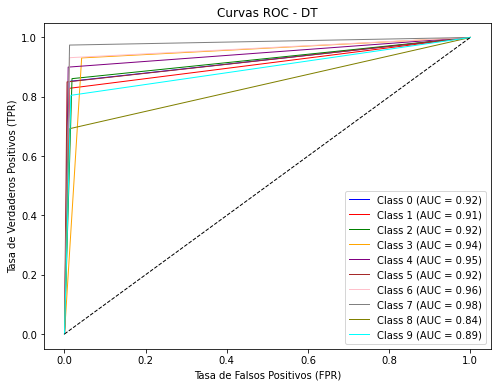

In [32]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(dt_fpr[i], dt_tpr[i], color=color, lw=1, label=f'Class {i} (AUC = {dt_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - DT')
plt.legend(loc='lower right')
plt.show()